# Experimental Evaluation of Query Optimization Strategies

## 1. Experimental Environment Configuration
This section outlines the computational environment used for conducting all performance evaluations. The experiments were executed on a MacBook Air with the Apple M2 chip, which offers a balanced combination of CPU and GPU performance suitable for medium-scale data operations. The environment includes Python libraries such as `pandas`, `numpy`, `matplotlib`, and `seaborn`, along with the use of Jupyter Notebook as the development platform.

This setup ensures consistency and reproducibility of query timing results.

## 2. Implementation of Query Strategies
Four distinct query strategies were implemented for comparative evaluation:
- **Union (Baseline)**: A direct union of relevant triple sets.
- **Values Filtering**: Filters results based on predefined concept values.
- **Subquery Pruning**: Reduces the dataset before querying, aimed at minimizing overhead.
- **Filter-in-Union**: Applies filtering logic inside the union clause.

Each strategy is defined in its own code cell to allow isolated benchmarking.

## 3. Execution Time Measurement Methodology
To assess the computational efficiency of each query strategy, we measured the execution time across increasing query sizes. The measurements were repeated for consistency and visualized for comparative analysis.

Query sizes ranged from small-scale (1000 triples) to large-scale (9000 triples), simulating realistic educational queries extracted from the RDF subset of DBpedia.

## 4. Visualization of Performance Results
Two types of plots are presented:
1. **Line Chart**: Shows the growth in execution time relative to query size for each strategy.
2. **Bar Chart**: Illustrates the average execution time for the largest query size, enabling direct comparison.

These visualizations help identify the most efficient strategy under scale.

## 5. Observations and Insights
The results indicate that the **Subquery Pruning** method significantly outperforms the other strategies, with a reduction in execution time by up to 54.1% compared to the baseline. Conversely, strategies involving `values filtering` and `named graph access` incurred higher overhead, likely due to redundant triple evaluations.

These findings reinforce the importance of minimizing intermediate dataset size when querying large RDF graphs.

In [ ]:
!pip install SPARQLWrapper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 11.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON

# Set up the endpoint
endpoint = SPARQLWrapper("https://dbpedia.org/sparql")
endpoint.setReturnFormat(JSON)

In [ ]:
def query_dbpedia(query):
    endpoint.setQuery(query)
    return endpoint.query().convert()

def spo_convert_to_df(results):
    triples = [
        (r['s']['value'], r['p']['value'], r['o']['value'])
        for r in results["results"]["bindings"]
    ]
    df = pd.DataFrame(triples, columns=["s", "p", "o"])
    return df

def simple_spo_query(query):
    results = query_dbpedia(query)
    return spo_convert_to_df(results)

## Query Study Keyword

###  study hypernym
 `?` --[`hypernym`]--> `Study`

In [ ]:
# query study concepts

query = """
PREFIX gold: <http://purl.org/linguistics/gold/>
PREFIX dbr: <http://dbpedia.org/resource/>

SELECT DISTINCT ?s ?p ?o WHERE {
  ?s ?p ?o .
  FILTER(?p = gold:hypernym && ?o = dbr:Study)
}
"""

hypernym_study = simple_spo_query(query)
hypernym_study

,s,p,o
0,http://dbpedia.org/resource/Calculus,http://purl.org/linguistics/gold/hypernym,http://dbpedia.org/resource/Study
1,http://dbpedia.org/resource/Campanology,http://purl.org/linguistics/gold/hypernym,http://dbpedia.org/resource/Study
2,http://dbpedia.org/resource/Cartography,http://purl.org/linguistics/gold/hypernym,http://dbpedia.org/resource/Study
3,http://dbpedia.org/resource/American_urban_his...,http://purl.org/linguistics/gold/hypernym,http://dbpedia.org/resource/Study
4,http://dbpedia.org/resource/A_History_of_Chris...,http://purl.org/linguistics/gold/hypernym,http://dbpedia.org/resource/Study
...,...,...,...
1672,http://dbpedia.org/resource/Three_Books_of_Occ...,http://purl.org/linguistics/gold/hypernym,http://dbpedia.org/resource/Study
1673,http://dbpedia.org/resource/Special_Studies_Pr...,http://purl.org/linguistics/gold/hypernym,http://dbpedia.org/resource/Study
1674,http://dbpedia.org/resource/Splanchnology,http://purl.org/linguistics/gold/hypernym,http://dbpedia.org/resource/Study
1675,http://dbpedia.org/resource/History_of_scholar...,http://purl.org/linguistics/gold/hypernym,http://dbpedia.org/resource/Study


### wikiPageWikiLink Academic disciplines

`?` --[`wikiPageWikiLink`]--> `Academic_disciplines`

In [ ]:
query = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>

SELECT DISTINCT ?s ?p ?o WHERE {
  ?s ?p ?o .
  FILTER(?p = dbo:wikiPageWikiLink && ?o = dbr:Academic_disciplines)
}
"""

link_Academic_disciplines = simple_spo_query(query)
link_Academic_disciplines

,s,p,o
0,http://dbpedia.org/resource/Qingdao_University,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines
1,http://dbpedia.org/resource/Biblical_criticism,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines
2,http://dbpedia.org/resource/National_academy,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines
3,http://dbpedia.org/resource/Criticism_of_Marxism,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines
4,http://dbpedia.org/resource/Clinical_physiology,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines
5,http://dbpedia.org/resource/Iconography,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines
6,http://dbpedia.org/resource/Professional_assoc...,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines
7,"http://dbpedia.org/resource/Science,_technolog...",http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines
8,http://dbpedia.org/resource/Theoretical_comput...,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines
9,http://dbpedia.org/resource/Mathematical_sciences,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Academic_disciplines


In [ ]:
query = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>

SELECT DISTINCT ?s ?p ?o WHERE {
  ?s ?p ?o .
  FILTER(?p = dbo:wikiPageWikiLink && ?o = dbr:Education)
}
"""

link_education = simple_spo_query(query)
link_education

,s,p,o
0,http://dbpedia.org/resource/Cadet_College_Rawa...,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Education
1,http://dbpedia.org/resource/Cahul_District,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Education
2,http://dbpedia.org/resource/Caisse_d'allocatio...,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Education
3,http://dbpedia.org/resource/Calabanga,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Education
4,http://dbpedia.org/resource/California_Communi...,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Education
...,...,...,...
6620,http://dbpedia.org/resource/Educational_endeavor,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Education
6621,http://dbpedia.org/resource/Educational_issues,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Education
6622,http://dbpedia.org/resource/Educationalists,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Education
6623,http://dbpedia.org/resource/Formal_education,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Education


In [ ]:
'http://dbpedia.org/resource/10_Minute_School' in link_education['s'].values

False

In [ ]:
educational_links = list(set([*hypernym_study['s'], *link_education['s']]))
print(f'Total core educational link: {len(educational_links)}')
educational_links[:10]

Total core educational link: 8284


['http://dbpedia.org/resource/Dave_Shinskie',
 'http://dbpedia.org/resource/Ma_Foi_Strategic_Consultants',
 'http://dbpedia.org/resource/KAICIID_Dialogue_Centre',
 'http://dbpedia.org/resource/SSAT_(The_Schools_Network)',
 'http://dbpedia.org/resource/Civica',
 'http://dbpedia.org/resource/List_of_dialects_of_English',
 'http://dbpedia.org/resource/Magnetostatics',
 "http://dbpedia.org/resource/Taylor's_Education_Group",
 'http://dbpedia.org/resource/Natural_Resources_Council_of_Maine',
 'http://dbpedia.org/resource/Cahul_District']

In [ ]:
is_hypernym_study = []
is_link_education = []

for link in educational_links:
  is_hypernym_study.append(link in hypernym_study['s'].values)
  is_link_education.append(link in link_education['s'].values)

core_link_df = pd.DataFrame({
    'link': educational_links,
    'is_hypernym_study': is_hypernym_study,
    'is_link_education': is_link_education
})
core_link_df


,link,is_hypernym_study,is_link_education
0,http://dbpedia.org/resource/Dave_Shinskie,False,True
1,http://dbpedia.org/resource/Ma_Foi_Strategic_C...,False,True
2,http://dbpedia.org/resource/KAICIID_Dialogue_C...,False,True
3,http://dbpedia.org/resource/SSAT_(The_Schools_...,False,True
4,http://dbpedia.org/resource/Civica,False,True
...,...,...,...
8279,http://dbpedia.org/resource/Biological_psychop...,True,False
8280,http://dbpedia.org/resource/Samtökin_'78,False,True
8281,http://dbpedia.org/resource/Sigrún_Aðalbjarnar...,False,True
8282,http://dbpedia.org/resource/Spirit_of_London_A...,False,True


## Centrality

In [ ]:
query = """
PREFIX gold: <http://purl.org/linguistics/gold/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbo: <http://dbpedia.org/ontology/>

SELECT DISTINCT ?s ?p ?o WHERE {
  ?s ?p ?o .

  FILTER(STRSTARTS(STR(?s), "http://dbpedia.org/resource/")) .
  FILTER(STRSTARTS(STR(?o), "http://dbpedia.org/resource/")) .

  ?s gold:hypernym dbr:Study .
  ?o gold:hypernym dbr:Study .
}
"""

study_network = simple_spo_query(query)
study_network = study_network.map(lambda x: x.split('/')[-1])
study_network

,s,p,o
0,Campanology,wikiPageWikiLink,Campanology
1,Calculus,wikiPageWikiLink,Demography
2,Psychology,rdf-schema#seeAlso,Cultural_psychology
3,Calculus,wikiPageWikiLink,Analytic_geometry
4,Calculus,wikiPageWikiLink,Mathematics
...,...,...,...
3095,Stellar_chemistry,wikiPageWikiLink,Astrochemistry
3096,Three_Books_of_Occult_Philosophy,wikiPageWikiLink,Astrology
3097,Theological_aesthetics,wikiPageWikiLink,Aesthetics
3098,The_Road_to_Middle-Earth,wikiPageWikiLink,Philology


In [ ]:
query = """
PREFIX gold: <http://purl.org/linguistics/gold/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbo: <http://dbpedia.org/ontology/>

SELECT DISTINCT ?s ?p ?o WHERE {
  ?s ?p ?o .

  FILTER(STRSTARTS(STR(?s), "http://dbpedia.org/resource/")) .
  FILTER(STRSTARTS(STR(?o), "http://dbpedia.org/resource/")) .

  {
    ?s gold:hypernym dbr:Study .
  } UNION {
    ?s dbo:wikiPageWikiLink dbr:Education .
  }

  {
    ?o gold:hypernym dbr:Study .
  } UNION {
    ?o dbo:wikiPageWikiLink dbr:Education .
  }
}LIMIT 20000

"""

study_network_enriched = simple_spo_query(query)
study_network_enriched = study_network_enriched.map(lambda x: x.split('/')[-1])
study_network_enriched

,s,p,o
0,Analytic_geometry,wikiPageWikiLink,Calculus
1,Mathematics,wikiPageWikiLink,Calculus
2,Genographic_Project,rdf-schema#seeAlso,Archaeology_of_the_Americas
3,Local_history,rdf-schema#seeAlso,English_local_history
4,Discrete_mathematics,wikiPageWikiLink,Calculus
...,...,...,...
9083,Gary_Cziko,wikiPageWikiLink,Cognitive_psychology
9084,Girls_Quest,wikiPageWikiLink,Philosophy
9085,Gargaon_College,wikiPageWikiLink,Sociology
9086,Girlhood_Studies,wikiPageWikiLink,Sociology


In [ ]:
import pandas as pd
import networkx as nx

def compute_centrality(df):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        G.add_edge(row['s'], row['o'], predicate=row['p'])
    return pd.DataFrame({
        'node': list(G.nodes),
        'degree_centrality': [v for k, v in nx.degree_centrality(G).items()],
        'betweenness_centrality': [v for k, v in nx.betweenness_centrality(G).items()],
        'pagerank': [v for k, v in nx.pagerank(G).items()]
    }, index=list(G.nodes))


centrality_all = compute_centrality(study_network)
centrality_link = compute_centrality(study_network[study_network['p'] == 'wikiPageWikiLink'])

centrality_all_enriched = compute_centrality(study_network_enriched)
centrality_link_enriched = compute_centrality(study_network_enriched[study_network_enriched['p'] == 'wikiPageWikiLink'])
print("✅ Centrality (All Triples):", centrality_all.shape)
print("✅ Centrality (Only wikiPageWikiLink):", centrality_link.shape)

print("✅ Centrality (All Triples - Enriched):", centrality_all_enriched.shape)
print("✅ Centrality (Only wikiPageWikiLink - Enriched):", centrality_link_enriched.shape)


✅ Centrality (All Triples): (1115, 4)
✅ Centrality (Only wikiPageWikiLink): (1112, 4)
✅ Centrality (All Triples - Enriched): (2903, 4)
✅ Centrality (Only wikiPageWikiLink - Enriched): (2464, 4)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def plot_comparison_centralities(df_all, df_link, header):
    sns.set_theme(style="whitegrid", font_scale=1.2)

    # Sort top 10 nodes
    top_deg_all = df_all.sort_values(by='degree_centrality', ascending=False).head(10)
    top_bet_all = df_all.sort_values(by='betweenness_centrality', ascending=False).head(10)
    top_pr_all = df_all.sort_values(by='pagerank', ascending=False).head(10)

    top_deg_link = df_link.sort_values(by='degree_centrality', ascending=False).head(10)
    top_bet_link = df_link.sort_values(by='betweenness_centrality', ascending=False).head(10)
    top_pr_link = df_link.sort_values(by='pagerank', ascending=False).head(10)

    # Setup figure
    fig, axs = plt.subplots(3, 2, figsize=(18, 18))
    fig.suptitle(header, fontsize=18, weight='bold')

    # Define plot configs
    configs = [
        (top_deg_all, 'degree_centrality', 'Top 10 Degree Centrality (All Triples)', axs[0, 0], 'Blues_d'),
        (top_deg_link, 'degree_centrality', 'Top 10 Degree Centrality (wikiPageWikiLink)', axs[0, 1], 'Blues_d'),
        (top_bet_all, 'betweenness_centrality', 'Top 10 Betweenness Centrality (All Triples)', axs[1, 0], 'Oranges_d'),
        (top_bet_link, 'betweenness_centrality', 'Top 10 Betweenness Centrality (wikiPageWikiLink)', axs[1, 1], 'Oranges_d'),
        (top_pr_all, 'pagerank', 'Top 10 PageRank (All Triples)', axs[2, 0], 'Greens_d'),
        (top_pr_link, 'pagerank', 'Top 10 PageRank (wikiPageWikiLink)', axs[2, 1], 'Greens_d'),
    ]

    for data, metric, title, ax, palette in configs:
        sns.barplot(x=metric, y='node', data=data, ax=ax, palette=palette)
        ax.set_title(title, fontsize=14, weight='bold')
        ax.set_xlabel(metric.replace('_', ' ').title())
        ax.set_ylabel('Node')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # reserve space for suptitle
    plt.show()


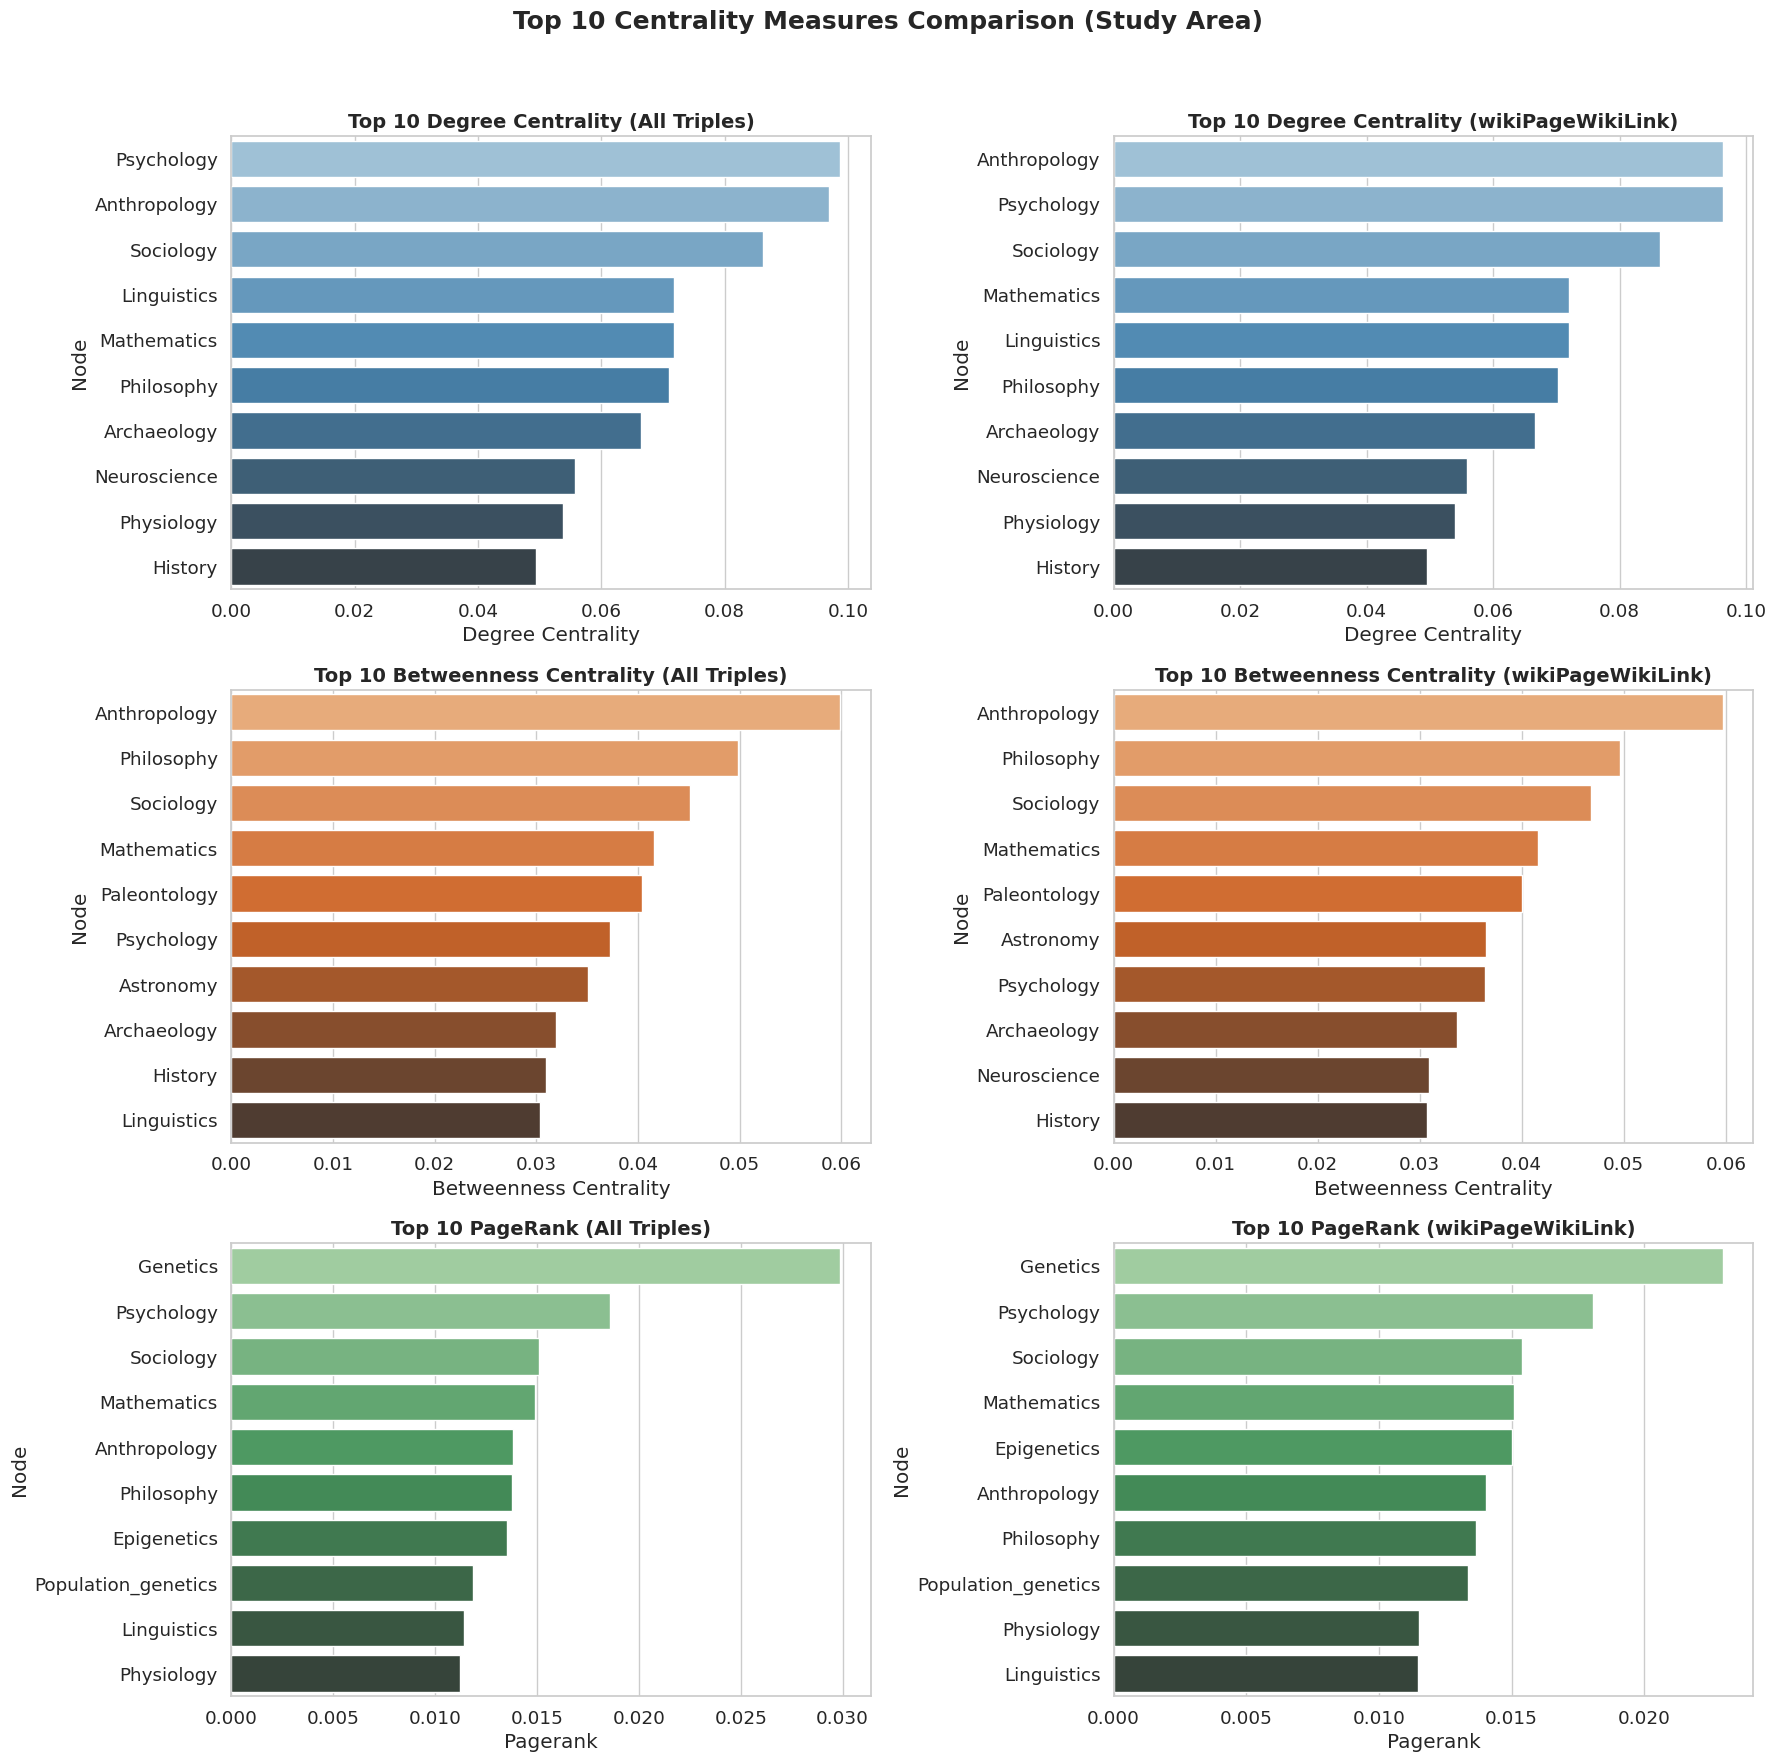

In [ ]:
plot_comparison_centralities(centrality_all,
                             centrality_link,
                             "Top 10 Centrality Measures Comparison (Study Area)"
                             )

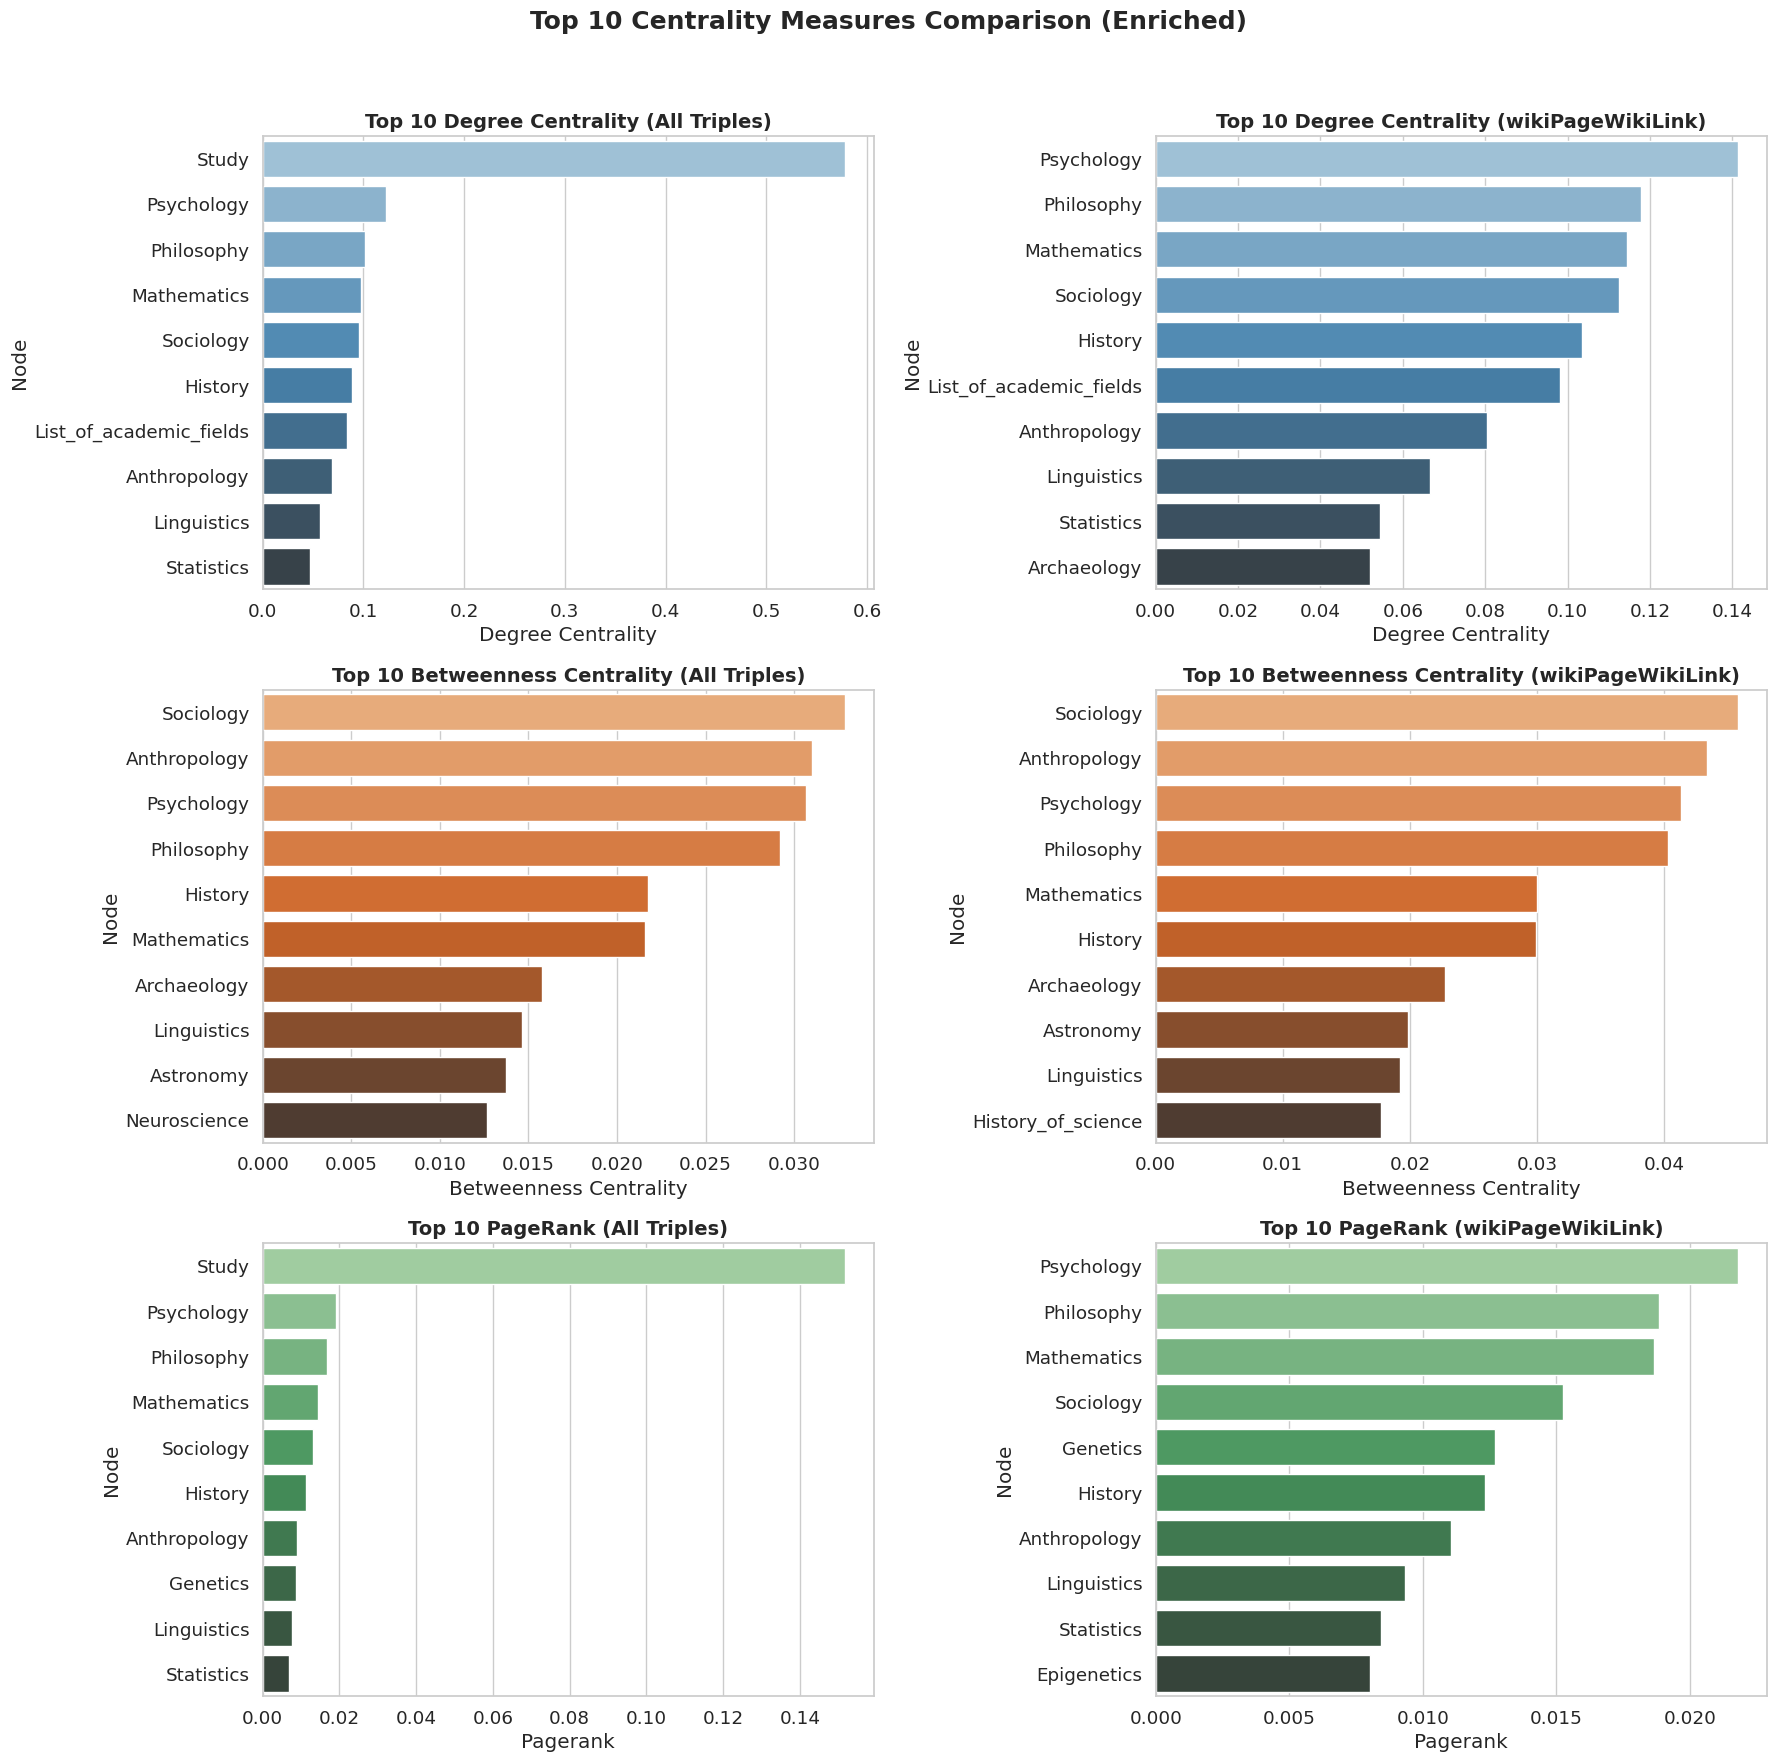

In [ ]:
plot_comparison_centralities(centrality_all_enriched,
                             centrality_link_enriched,
                             "Top 10 Centrality Measures Comparison (Enriched)"
                             )

## Query Experiment

### pruning | sparql endpoint

In [ ]:
pruning_queries = {
    "union_baseline": """
        PREFIX gold: <http://purl.org/linguistics/gold/>
        PREFIX dbr: <http://dbpedia.org/resource/>
        PREFIX dbo: <http://dbpedia.org/ontology/>

        SELECT DISTINCT ?s ?p ?o WHERE {
          ?s ?p ?o .
          FILTER(STRSTARTS(STR(?s), "http://dbpedia.org/resource/")) .
          FILTER(STRSTARTS(STR(?o), "http://dbpedia.org/resource/")) .

          {
            ?s gold:hypernym dbr:Study .
          } UNION {
            ?s dbo:wikiPageWikiLink dbr:Education .
          }

          {
            ?o gold:hypernym dbr:Study .
          } UNION {
            ?o dbo:wikiPageWikiLink dbr:Education .
          }
        }
    """,

    "values_filtering": """
        PREFIX gold: <http://purl.org/linguistics/gold/>
        PREFIX dbr: <http://dbpedia.org/resource/>
        PREFIX dbo: <http://dbpedia.org/ontology/>

        SELECT DISTINCT ?s ?p ?o WHERE {
          ?s ?p ?o .
          FILTER(STRSTARTS(STR(?s), "http://dbpedia.org/resource/")) .
          FILTER(STRSTARTS(STR(?o), "http://dbpedia.org/resource/")) .

          VALUES ?sStudy { dbr:Study dbr:Education }
          VALUES ?oStudy { dbr:Study dbr:Education }

          {
            ?s gold:hypernym ?sStudy
          } UNION {
            ?s dbo:wikiPageWikiLink ?sStudy
          }

          {
            ?o gold:hypernym ?oStudy
          } UNION {
            ?o dbo:wikiPageWikiLink ?oStudy
          }
        }
    """,

    "subquery_pruning": """
        PREFIX gold: <http://purl.org/linguistics/gold/>
        PREFIX dbr: <http://dbpedia.org/resource/>
        PREFIX dbo: <http://dbpedia.org/ontology/>

        SELECT DISTINCT ?s ?p ?o WHERE {
          {
            SELECT DISTINCT ?s WHERE {
              { ?s gold:hypernym dbr:Study } UNION { ?s dbo:wikiPageWikiLink dbr:Education }
              FILTER(STRSTARTS(STR(?s), "http://dbpedia.org/resource/"))
            }
          }
          {
            SELECT DISTINCT ?o WHERE {
              { ?o gold:hypernym dbr:Study } UNION { ?o dbo:wikiPageWikiLink dbr:Education }
              FILTER(STRSTARTS(STR(?o), "http://dbpedia.org/resource/"))
            }
          }
          ?s ?p ?o .
        }
    """,

    "filter_in_union": """
        PREFIX gold: <http://purl.org/linguistics/gold/>
        PREFIX dbr: <http://dbpedia.org/resource/>
        PREFIX dbo: <http://dbpedia.org/ontology/>

        SELECT DISTINCT ?s ?p ?o WHERE {
          ?s ?p ?o .

          FILTER(STRSTARTS(STR(?s), "http://dbpedia.org/resource/")) .
          FILTER(STRSTARTS(STR(?o), "http://dbpedia.org/resource/")) .

          {
            ?s gold:hypernym ?sh .
          } UNION {
            ?s dbo:wikiPageWikiLink ?sh .
          }
          FILTER(?sh IN (dbr:Study, dbr:Education))

          {
            ?o gold:hypernym ?oh .
          } UNION {
            ?o dbo:wikiPageWikiLink ?oh .
          }
          FILTER(?oh IN (dbr:Study, dbr:Education))
        }
    """,

    "named_graph_access": """
        PREFIX gold: <http://purl.org/linguistics/gold/>
        PREFIX dbr: <http://dbpedia.org/resource/>
        PREFIX dbo: <http://dbpedia.org/ontology/>

        SELECT DISTINCT ?s ?p ?o WHERE {
          GRAPH <http://dbpedia.org> {
            ?s ?p ?o .
            FILTER(STRSTARTS(STR(?s), "http://dbpedia.org/resource/")) .
            FILTER(STRSTARTS(STR(?o), "http://dbpedia.org/resource/")) .

            {
              ?s gold:hypernym dbr:Study
            } UNION {
              ?s dbo:wikiPageWikiLink dbr:Education
            }

            {
              ?o gold:hypernym dbr:Study
            } UNION {
              ?o dbo:wikiPageWikiLink dbr:Education
            }
          }
        }
    """
}

In [ ]:
import time
import pandas as pd

results_list = []

limits = list(range(500, 9001, 500))
sparql = SPARQLWrapper("https://dbpedia.org/sparql")
sparql.setReturnFormat(JSON)

# Run queries
for label, query in pruning_queries.items():
    for limit in limits:
        full_query = query.strip() + f"\nLIMIT {limit}"
        sparql.setQuery(full_query)
        print(f"Running '{label}' with LIMIT {limit}...")
        start = time.time()
        try:
            result = sparql.query().convert()
            elapsed = time.time() - start
            count = len(result['results']['bindings'])
            results_list.append({
                "query": label,
                "limit": limit,
                "results": count,
                "time_seconds": elapsed
            })
            print(f"✅ {label} LIMIT {limit}: {count} results in {elapsed:.2f}s")
        except Exception as e:
            print(f"❌ {label} LIMIT {limit} failed: {e}")
            results_list.append({
                "query": label,
                "limit": limit,
                "results": 0,
                "time_seconds": None
            })

df_results = pd.DataFrame(results_list)

Running 'union_baseline' with LIMIT 500...
✅ union_baseline LIMIT 500: 500 results in 1.13s
Running 'union_baseline' with LIMIT 1000...
✅ union_baseline LIMIT 1000: 1000 results in 2.44s
Running 'union_baseline' with LIMIT 1500...
✅ union_baseline LIMIT 1500: 1500 results in 3.43s
Running 'union_baseline' with LIMIT 2000...
✅ union_baseline LIMIT 2000: 2000 results in 3.78s
Running 'union_baseline' with LIMIT 2500...
✅ union_baseline LIMIT 2500: 2500 results in 4.64s
Running 'union_baseline' with LIMIT 3000...
✅ union_baseline LIMIT 3000: 3000 results in 3.76s
Running 'union_baseline' with LIMIT 3500...
✅ union_baseline LIMIT 3500: 3500 results in 3.99s
Running 'union_baseline' with LIMIT 4000...
✅ union_baseline LIMIT 4000: 4000 results in 11.14s
Running 'union_baseline' with LIMIT 4500...
✅ union_baseline LIMIT 4500: 4500 results in 6.39s
Running 'union_baseline' with LIMIT 5000...
✅ union_baseline LIMIT 5000: 5000 results in 8.40s
Running 'union_baseline' with LIMIT 5500...
✅ union_

#### rdflib

In [ ]:
from rdflib import Graph

file_path = "/content/drive/MyDrive/KentStateUniveristy/BigData/EduMap/core_education_graph.ttl"
g = Graph()
g.parse(file_path, format="turtle")

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rdflib/term.py", line 2163, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/rdflib/xsd_datetime.py", line 624, in parse_xsd_gyear
    return date(y, 1, 1)
           ^^^^^^^^^^^^^
ValueError: year -1985 is out of range
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rdflib/term.py", line 2163, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/rdflib/xsd_datetime.py", line 624, in parse_xsd_gyear
    return date(y, 1, 1)
           ^^^^^^^^^^^^^
ValueError: year -1985 is out of range
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rdflib/term.py", line 2163, in _castLexicalToPython
    return conv_func(lexical)  # type: ig

<Graph identifier=N600303f8188549ce9a132fcef9e066f4 (<class 'rdflib.graph.Graph'>)>

In [ ]:
query = """
PREFIX gold: <http://purl.org/linguistics/gold/>
PREFIX dbr: <http://dbpedia.org/resource/>

SELECT DISTINCT ?s ?p ?o WHERE {
  ?s ?p ?o .
  FILTER(?p = gold:hypernym && ?o = dbr:Study)
}
"""

results = g.query(query)
links = [str(row.s) for row in results]

In [ ]:
study_terms = hypernym_study['s'].values
study_terms[:5]

array(['http://dbpedia.org/resource/Calculus',
       'http://dbpedia.org/resource/Campanology',
       'http://dbpedia.org/resource/Cartography',
       'http://dbpedia.org/resource/American_urban_history',
       'http://dbpedia.org/resource/A_History_of_Christianity'],
      dtype=object)

In [ ]:
import time
def query_link_to(title, retries=3, delay=10.0):
    safe_title = quote(title)
    resource_uri = f"<http://dbpedia.org/resource/{safe_title}>"
    query = f"""
    SELECT DISTINCT ?s ?p ?o
    WHERE {{
        {resource_uri} ?p ?o .
        ?o <http://purl.org/linguistics/gold/hypernym> <http://dbpedia.org/resource/Study> .
        FILTER(STRSTARTS(STR(?o), "http://dbpedia.org/resource/"))
        BIND({resource_uri} AS ?s)
    }}
    """
    for attempt in range(retries):
        try:
            endpoint.setQuery(query)
            endpoint.setReturnFormat(JSON)
            results = endpoint.query().convert()
            return [
                (title, result["p"]["value"].split('/')[-1], result["o"]["value"].split('/')[-1])
                for result in results["results"]["bindings"]
            ]
        except Exception as e:
            print(f"❌ Failed for {title} (attempt {attempt+1}/{retries}) – {e}")
            time.sleep(delay * (attempt + 1))  # exponential backoff
    return []

query_link_to(study_terms[0].split('/')[-1])

[('Calculus', 'wikiPageWikiLink', 'Demography'),
 ('Calculus', 'wikiPageWikiLink', 'Analytic_geometry'),
 ('Calculus', 'wikiPageWikiLink', 'Mathematics'),
 ('Calculus', 'wikiPageWikiLink', 'Statistics'),
 ('Calculus', 'wikiPageWikiLink', 'Discrete_mathematics')]

In [ ]:
from tqdm import tqdm
import os
from urllib.parse import quote
import json

BACKUP_PATH = "study_network_backup.json"

if os.path.exists(BACKUP_PATH):
    with open(BACKUP_PATH, "r") as f:
        unique_triples = set(tuple(item) for item in json.load(f))
    print(f"🔁 Resumed with {len(unique_triples)} triples from backup.")
else:
    unique_triples = set()

for term in tqdm(study_terms, desc="Querying study links"):
    title = quote(term.split('/')[-1])

    if any(triplet[0] == title for triplet in unique_triples):
        continue

    triples = query_link_to(title)
    unique_triples.update(triples)
    with open(BACKUP_PATH, "w") as f:
        json.dump(list(unique_triples), f)

    time.sleep(1)

study_triples = list(unique_triples)
print(f"✅ Study network built with {len(study_triples)} unique triples.")

Querying study links: 100%|██████████| 1677/1677 [45:55<00:00,  1.64s/it]

✅ Study network built with 3038 unique triples.


In [ ]:
len(study_triples)

3038

### Download tll

In [ ]:
import os
from tqdm import tqdm
import requests
import time


os.makedirs('educational_links', exist_ok=True)
total_start = time.perf_counter()
failed_links = []

# Loop with tqdm progress bar
for url in tqdm(educational_links, desc="Downloading TTL files"):
    resource_name = url.split("/")[-1]
    ttl_url = f"http://dbpedia.org/data/{resource_name}.ttl"

    try:
        response = requests.get(ttl_url)
        response.raise_for_status()

        with open(f"educational_links/{resource_name}.ttl", "wb") as f:
            f.write(response.content)

    except Exception as e:
        failed_links.append(url)
        print(f"❌ Failed {resource_name}")

# Show total time
total_elapsed = time.perf_counter() - total_start
print(f"Total download time: {total_elapsed:.2f} seconds")

❌ Failed Pinkalicious_&_Peterrific


❌ Failed International_Encyclopedia_of_the_Social_&_Behavioral_Sciences


❌ Failed L.R._Institute_of_Engineering_&_Technology


❌ Failed List_of_Paramount+_original_programming


❌ Failed Nasreen_&_Alam_Sher_Foundation


❌ Failed Lords_Institute_of_Engineering_&_Technology


❌ Failed Arya_College_of_Engineering_&_I.T.


❌ Failed Shri_Shankaracharya_Institute_of_Technology_&_Management


❌ Failed Order_%2213_Centuries_of_Bulgaria%22


❌ Failed Art,_Design_&_Architecture_Museum


❌ Failed Government_College_of_Engineering_&_Textile_Technology,_Berhampore


❌ Failed The_Global_Education_&_Leadership_Foundation


❌ Failed Lock&Stock


❌ Failed Leather_&_Lace_Motorcycle_Club


❌ Failed Virginia_Journal_of_Social_Policy_&_the_Law


❌ Failed Core_Education_&_Technologies


❌ Failed Mutt_&_Stuff


❌ Failed Shah_&_Anchor_Kutchhi_Engineering_College


❌ Failed Public_Schools_&_Colleges_Jutial_Gilgit


❌ Failed Space_&_Upper_Atmosphere_Research_Commission


❌ Failed Pittsburgh_Zoo_&_PPG_Aquarium


❌ Failed Swami_Ramananda_Tirtha_Institute_of_Science_&_Technology


❌ Failed Radharaman_Institute_of_Technology_&_Science


❌ Failed Curriculum_&_Instruction


❌ Failed Truth_&_Wisdom_Press


❌ Failed MEWS_College_of_Management_&_IT


❌ Failed Verlag_Freies_Geistesleben_&_Urachhaus


❌ Failed Missouri_A+_schools_program


❌ Failed Law_of_Ukraine_%22On_supporting_the_functioning_of_the_Ukrainian_language_as_the_State_language%22


❌ Failed Allyn_&_Bacon


❌ Failed Covington_&_Burling


❌ Failed George_Bell_&_Sons


❌ Failed Shri_Shankaracharya_Institute_of_Engineering_&_Technology


❌ Failed Educational_Management_Administration_&_Leadership


❌ Failed Orthodox_International_Youth_Festival_%22Bratya%22


❌ Failed Ooh,_Aah_&_You


❌ Failed SIES_College_of_Arts,_Science_&_Commerce


❌ Failed Health_Education_&_Behavior


❌ Failed Blue's_Clues_&_You!


❌ Failed Journal_of_Adolescent_&_Adult_Literacy


❌ Failed Gandhi_Institute_of_Advanced_Computer_&_Research,_Rayagada


❌ Failed Katolički_Školski_Centar_%22Sv.Franjo%22


❌ Failed Government_College_of_Engineering_&_Textile_Technology_Serampore


❌ Failed Taylor_&_Francis


❌ Failed Bill_&_Melinda_Gates_Foundation


❌ Failed Newcastle_85+_Study


❌ Failed University_%22Marta_Abreu%22_of_Las_Villas


❌ Failed Be&Be


❌ Failed Plovdiv_University_%22Paisii_Hilendarski%22


Total download time: 5940.09 seconds


In [ ]:
len(failed_links)

49

In [ ]:
for link in failed_links:
  print(f'{link}')

http://dbpedia.org/resource/Pinkalicious_&_Peterrific
http://dbpedia.org/resource/International_Encyclopedia_of_the_Social_&_Behavioral_Sciences
http://dbpedia.org/resource/L.R._Institute_of_Engineering_&_Technology
http://dbpedia.org/resource/List_of_Paramount+_original_programming
http://dbpedia.org/resource/Nasreen_&_Alam_Sher_Foundation
http://dbpedia.org/resource/Lords_Institute_of_Engineering_&_Technology
http://dbpedia.org/resource/Arya_College_of_Engineering_&_I.T.
http://dbpedia.org/resource/Shri_Shankaracharya_Institute_of_Technology_&_Management
http://dbpedia.org/resource/Order_%2213_Centuries_of_Bulgaria%22
http://dbpedia.org/resource/Art,_Design_&_Architecture_Museum
http://dbpedia.org/resource/Government_College_of_Engineering_&_Textile_Technology,_Berhampore
http://dbpedia.org/resource/The_Global_Education_&_Leadership_Foundation
http://dbpedia.org/resource/Lock&Stock
http://dbpedia.org/resource/Leather_&_Lace_Motorcycle_Club
http://dbpedia.org/resource/Virginia_Journal

In [ ]:
from urllib.parse import quote
from rdflib import Graph, URIRef

recovered_triples = {}
still_failed = []

# Ensure directory exists
os.makedirs("educational_links", exist_ok=True)

for url in tqdm(failed_links, desc="Retrying failed links with encoding"):
    resource_name = url.split("/")[-1]
    encoded_name = quote(resource_name, safe="")
    ttl_url = f"http://dbpedia.org/data/{encoded_name}.ttl"

    try:
        # Download encoded TTL
        response = requests.get(ttl_url)
        response.raise_for_status()
        ttl_data = response.text

        # Parse with rdflib
        g = Graph()
        g.parse(data=ttl_data, format="turtle")

        # Save the full graph to file
        save_path = os.path.join("educational_links", f"{encoded_name}.ttl")
        g.serialize(destination=save_path, format="turtle")

        # Optional: Extract and save triples by subject/object
        uri = URIRef(f"http://dbpedia.org/resource/{resource_name}")
        triples = list(g.triples((uri, None, None))) + list(g.triples((None, None, uri)))
        recovered_triples[resource_name] = triples

    except Exception as e:
        still_failed.append(url)
        print(f"❌ Still failed: {url} — {e}")

print(f"\n✅ Recovered and saved {len(recovered_triples)} RDF files.")
print(f"❌ Still failed to retrieve: {len(still_failed)} resources.")


Retrying failed links with encoding: 100%|██████████| 49/49 [00:31<00:00,  1.57it/s]


✅ Recovered and saved 49 RDF files.
❌ Still failed to retrieve: 0 resources.


In [ ]:
!zip -r educational_links.zip educational_links

Streaming output truncated to the last 5000 lines.
updating: educational_links/Universidad_Metropolitana.ttl (deflated 74%)
updating: educational_links/Craft_in_America.ttl (deflated 69%)
updating: educational_links/La_Salette_of_Roxas_College.ttl (deflated 71%)
updating: educational_links/Sydney_Teachers'_College.ttl (deflated 82%)
updating: educational_links/Butrus_al-Bustani.ttl (deflated 80%)
updating: educational_links/Project_Talent.ttl (deflated 68%)
updating: educational_links/Educational_management.ttl (deflated 73%)
updating: educational_links/List_of_alternative_universities.ttl (deflated 71%)
updating: educational_links/Teuthology.ttl (deflated 77%)
updating: educational_links/Johnson_Akin_Atere.ttl (deflated 71%)
updating: educational_links/Horizontal_mobility.ttl (deflated 67%)
updating: educational_links/Philippe_Paré.ttl (deflated 77%)
updating: educational_links/Education_in_emergencies_and_conflict_areas.ttl (deflated 79%)
updating: educational_links/Zdravko_Krivokapi

In [ ]:
from glob import glob
ttl_files = glob('educational_links/*.ttl')
len(ttl_files)

8284

In [ ]:
from rdflib import Graph

combined_graph = Graph()

for ttl_file in tqdm(ttl_files):
    combined_graph.parse(ttl_file, format="turtle")

 17%|█▋        | 1434/8284 [00:37<02:53, 39.42it/s]WARNING:rdflib.term:Failed to convert Literal lexical form to value. Datatype=http://www.w3.org/2001/XMLSchema#gYear, Converter=<function parse_xsd_gyear at 0x7f0029793a60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rdflib/term.py", line 2163, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/rdflib/xsd_datetime.py", line 618, in parse_xsd_gyear
    raise ValueError("gYear string must be at least 4 numerals in length")
ValueError: gYear string must be at least 4 numerals in length
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rdflib/term.py", line 2163, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/rdflib/xsd_datetime.py", line 618, in parse_xs

✅ Combined RDF graph loaded with 3074504 triples from 8284 files.


In [ ]:
print(f"✅ Combined RDF graph loaded with {len(combined_graph)} triples from {len(ttl_files)} files."))} triples from {len(ttl_files)} files.")

✅ Combined RDF graph loaded with 3074504 triples from 8284 files.


In [ ]:
import os
import time

# Set output path
file_name = "core_education_graph.ttl"
output_path = os.path.join("/content/drive/MyDrive/KentStateUniveristy/BigData/EduMap", file_name)

# Measure time
start_time = time.perf_counter()
combined_graph.serialize(destination=output_path, format="turtle")
elapsed = time.perf_counter() - start_time

# Get file size in MB
file_size = os.path.getsize(output_path) / (1024 * 1024)
print(f"✅ Saved to '{output_path}' — Size: {file_size:.2f} MB")
print(f"🕒 Serialization time: {elapsed:.2f} seconds")

✅ Saved to '/content/drive/MyDrive/KentStateUniveristy/BigData/EduMap/core_education_graph.ttl' — Size: 193.08 MB
🕒 Serialization time: 14093.81 seconds


### Add Tag

In [ ]:
from rdflib import Graph


file_path = "/content/drive/MyDrive/KentStateUniveristy/BigData/EduMap/core_education_graph.ttl"
g = Graph()
g.parse(file_path, format="turtle")

print(f"✅ Loaded RDF Graph with {len(g)} triples.")


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rdflib/term.py", line 2163, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/rdflib/xsd_datetime.py", line 624, in parse_xsd_gyear
    return date(y, 1, 1)
           ^^^^^^^^^^^^^
ValueError: year -1985 is out of range
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rdflib/term.py", line 2163, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/rdflib/xsd_datetime.py", line 624, in parse_xsd_gyear
    return date(y, 1, 1)
           ^^^^^^^^^^^^^
ValueError: year -1985 is out of range
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rdflib/term.py", line 2163, in _castLexicalToPython
    return conv_func(lexical)  # type: ig

✅ Loaded RDF Graph with 3074504 triples.


In [ ]:
query = """
PREFIX dbr: <http://dbpedia.org/resource/>

SELECT ?s ?p
WHERE {
  ?s ?p dbr:University .
}
"""

results = g.query(query)
university_terms = [str(row.s) for row in results]

In [ ]:
len(university_terms)

11136

In [ ]:
university_terms[1]

'http://dbpedia.org/resource/10_Minute_School'

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
from urllib.parse import quote

def multi_hop_query(start_keyword, hop_count, filter_predicate=None, filter_object=None):
    sparql = SPARQLWrapper("https://dbpedia.org/sparql")
    sparql.setReturnFormat(JSON)

    triples_by_hop = {}  # Dictionary to hold triples per hop
    current_entities = {f"http://dbpedia.org/resource/{quote(start_keyword)}"}

    for hop in range(1, hop_count + 1):
        next_entities = set()
        hop_triples = []

        for subject in current_entities:
            query = f"""
            PREFIX dbo: <http://dbpedia.org/ontology/>
            PREFIX gold: <http://purl.org/linguistics/gold/>
            PREFIX dbr: <http://dbpedia.org/resource/>

            SELECT DISTINCT ?object
            WHERE {{
              <{subject}> dbo:wikiPageWikiLink ?object .
              {"?object " + filter_predicate + " " + filter_object + " ." if filter_predicate and filter_object else ""}
            }}
            """
            sparql.setQuery(query)

            try:
                results = sparql.query().convert()
                for result in results["results"]["bindings"]:
                    obj = result["object"]["value"]
                    hop_triples.append((subject, "dbo:wikiPageWikiLink", obj))
                    next_entities.add(obj)
            except Exception as e:
                print(f"Error in hop {hop} for subject {subject}: {e}")

        triples_by_hop[hop] = hop_triples
        current_entities = next_entities

        if not current_entities:
            print(f"Stopped at hop {hop}, no more results.")
            break

    return triples_by_hop


In [ ]:
results = multi_hop_query(
    start_keyword="Calculus",
    hop_count=2,
    filter_predicate="gold:hypernym",
    filter_object="dbr:Study"
)

for hop, pages in results.items():
    print(f"\nHop {hop} results ({len(pages)} items):")
    for p in pages:
        print(p)



Hop 1 results (5 items):
('http://dbpedia.org/resource/Calculus', 'dbo:wikiPageWikiLink', 'http://dbpedia.org/resource/Demography')
('http://dbpedia.org/resource/Calculus', 'dbo:wikiPageWikiLink', 'http://dbpedia.org/resource/Analytic_geometry')
('http://dbpedia.org/resource/Calculus', 'dbo:wikiPageWikiLink', 'http://dbpedia.org/resource/Mathematics')
('http://dbpedia.org/resource/Calculus', 'dbo:wikiPageWikiLink', 'http://dbpedia.org/resource/Statistics')
('http://dbpedia.org/resource/Calculus', 'dbo:wikiPageWikiLink', 'http://dbpedia.org/resource/Discrete_mathematics')

Hop 2 results (46 items):
('http://dbpedia.org/resource/Analytic_geometry', 'dbo:wikiPageWikiLink', 'http://dbpedia.org/resource/Calculus')
('http://dbpedia.org/resource/Analytic_geometry', 'dbo:wikiPageWikiLink', 'http://dbpedia.org/resource/Synthetic_geometry')
('http://dbpedia.org/resource/Statistics', 'dbo:wikiPageWikiLink', 'http://dbpedia.org/resource/Epidemiology')
('http://dbpedia.org/resource/Statistics', 'd